# Cel

 * Poprzedni eksperyment - Nasze dane balanced data
 * Inbalanced data
 * UnderSampling
 * OverSampling
    

# Imports + DataSource

In [8]:
import os

dataSource = '/home/torak28/Desktop/Studia/MGU/Projekt/dataSource'
    

In [9]:
from PIL import Image

def verify_picture(pic):
    try:
        im = Image.open(pic)
        im.verify()
        im.close()
        im = Image.open(pic)
        im.resize((224,224))
        im.convert('RGB')
        if sum(im.convert("L").getextrema()) in (0, 2):
            return False
        if os.stat(pic).st_size == 503:
            return False
        return True
    except Exception as err: 
        return False

if os.name != 'nt': 
    out = verify_picture('../../MGU/Projekt/PS-Battles-master/originals/49366m.jpg')
    print(out)
else:
    out = verify_picture('..\..\MGU\Data\PS-Battles-master\originals\49366m.jpg')
    print(out)

False


# Clear

In [48]:
from shutil import rmtree

def clear():
    clearPath = '/home/torak28/Desktop/Studia/MGU/Projekt/photos/'

    tmp = ['balanced', 'inbl', 'Oversampling', 'Undersampling']
    tmp2 = ['test', 'valid']
    tmp3 = ['org', 'ps']

    slash = '/' if os.name != 'nt' else '\\'

    for i in tmp:
        for j in tmp2:
            for k in tmp3:
                rm = clearPath + i + slash + j + slash + k + slash
                rmtree(rm)
                os.mkdir(rm)

# Stats

In [59]:
import matplotlib.pyplot as plt

def stats():
    tmp = ['balanced', 'inbl', 'Oversampling', 'Undersampling']
    statPath = '/home/torak28/Desktop/Studia/MGU/Projekt/photos/'

    for i in tmp:

        plt.figure(1, figsize = (15,8)) 
        plt.suptitle(i, fontsize=16)

        # Testing
        plt.subplot(221)  

        org_files = len(os.listdir(statPath + i + slash + 'test' + slash + 'org' + slash))
        ps_files = len(os.listdir(statPath + i + slash  + 'test' + slash + 'ps' + slash))  
        lim = org_files if org_files >= ps_files else ps_files
        plt.bar(['org', 'ps'], [org_files, ps_files], align='center', alpha=0.5)  

        plt.title('Test')  
        plt.ylabel('Number of Files') 

        # Valid
        plt.subplot(222)  

        org_files = len(os.listdir(statPath + i + slash  + 'valid' + slash + 'org' + slash))
        ps_files = len(os.listdir(statPath + i + slash  + 'valid' + slash + 'ps' + slash))  
        plt.bar(['org', 'ps'], [org_files, ps_files], align='center', alpha=0.5)  

        plt.title('Valid')  
        plt.ylabel('Number of Files')  
        plt.ylim((0, lim)) 

        plt.show()


# Balanced Data(take first)

In [76]:
from shutil import copyfile

path = dataSource
slash = '/' if os.name != 'nt' else '\\'
os.chdir(path)

def do_it_test(dst):

    org = os.listdir('originals')
    for i in org:
        if verify_picture('originals' + slash + i):
            name = os.path.splitext(i)[0]
            tmp = os.listdir('photoshops' + slash + name)[:1]
            for j in tmp:
                if verify_picture('photoshops' + slash + name + slash + j):
                    copyfile(os.path.abspath('photoshops' + slash + name + slash + j), os.path.abspath(dst + 'test' + slash + 'ps' + slash + j))
                    copyfile(os.path.abspath('originals' + slash + i), os.path.abspath(dst + 'test' + slash + 'org' + slash + i))
    all_files = len(os.listdir(dst + 'test' + slash + 'org' + slash)) + len(os.listdir(dst + 'test' + slash + 'ps' + slash))
    org_files = len(os.listdir(dst + 'test' + slash + 'org' + slash))
    ps_files = len(os.listdir(dst + 'test' + slash + 'ps' + slash))         
    print(f'All files: {all_files}\n\tORG: {org_files}\n\tPSS: {ps_files}')

import random

def do_it_valid(dst='..' + slash + 'photos' + slash + 'balanced' + slash):
    amount_of_org = round(len(os.listdir(dst + 'test' + slash + 'org' + slash)) / 4)
    amount_of_ps = round(len(os.listdir(dst + 'test' + slash + 'ps' + slash)) / 4)
    
    org = os.listdir(dst + 'test' + slash + 'org' + slash)
    ps = os.listdir(dst + 'test' + slash + 'ps' + slash)
    

    for _ in random.sample(org, k=amount_of_org):
        copyfile(os.path.abspath(dst + 'test' + slash + 'org' + slash + _), dst + 'valid' + slash + 'org' + slash + _)

    for _ in random.sample(ps, k=amount_of_ps):
        copyfile(os.path.abspath(dst + 'test' + slash + 'ps' + slash + _), dst + 'valid' + slash + 'ps' + slash + _)

    test = len(os.listdir(dst + 'test' + slash + 'org' + slash)) + len(os.listdir(dst + 'test' + slash + 'ps' + slash))
    valid = len(os.listdir(dst + 'valid' + slash + 'org' + slash)) + len(os.listdir(dst + 'valid' + slash + 'ps' + slash))

    print(f'Test data: {test}, Valid data: {valid}')

do_it_test(dst='..' + slash + 'photos' + slash + 'balanced' + slash)
do_it_valid(dst='..' + slash + 'photos' + slash + 'balanced' + slash)

All files: 12
	ORG: 6
	PSS: 6
Test data: 12, Valid data: 4


# Inbalanced Data

In [77]:
def do_it_test(dst):

    org = os.listdir('originals')
    for i in org:
        if verify_picture('originals' + slash + i):
            name = os.path.splitext(i)[0]
            tmp = os.listdir('photoshops' + slash + name)
            for j in tmp:
                if verify_picture('photoshops' + slash + name + slash + j):
                    copyfile(os.path.abspath('photoshops' + slash + name + slash + j), os.path.abspath(dst + 'test' + slash + 'ps' + slash + j))
        copyfile(os.path.abspath('originals' + slash + i), os.path.abspath(dst + 'test' + slash + 'org' + slash + i))
    all_files = len(os.listdir(dst + 'test' + slash + 'org' + slash)) + len(os.listdir(dst + 'test' + slash + 'ps' + slash))
    org_files = len(os.listdir(dst + 'test' + slash + 'org' + slash))
    ps_files = len(os.listdir(dst + 'test' + slash + 'ps' + slash))         
    print(f'All files: {all_files}\n\tORG: {org_files}\n\tPSS: {ps_files}')
    
do_it_test(dst='..' + slash + 'photos' + slash + 'inbl' + slash)
do_it_valid(dst='..' + slash + 'photos' + slash + 'inbl' + slash)

All files: 50
	ORG: 6
	PSS: 44
Test data: 50, Valid data: 13


# Undersampling

In [78]:
def do_it_test(dst):

    org = os.listdir('originals')
    for i in org:
        if verify_picture('originals' + slash + i):
            name = os.path.splitext(i)[0]
            tmp = [random.choice(os.listdir('photoshops' + slash + name))]
            for j in tmp:
                if verify_picture('photoshops' + slash + name + slash + j):
                    copyfile(os.path.abspath('photoshops' + slash + name + slash + j), os.path.abspath(dst + 'test' + slash + 'ps' + slash + j))
                    copyfile(os.path.abspath('originals' + slash + i), os.path.abspath(dst + 'test' + slash + 'org' + slash + i))
    all_files = len(os.listdir(dst + 'test' + slash + 'org' + slash)) + len(os.listdir(dst + 'test' + slash + 'ps' + slash))
    org_files = len(os.listdir(dst + 'test' + slash + 'org' + slash))
    ps_files = len(os.listdir(dst + 'test' + slash + 'ps' + slash))         
    print(f'All files: {all_files}\n\tORG: {org_files}\n\tPSS: {ps_files}')

do_it_test(dst='..' + slash + 'photos' + slash + 'Undersampling' + slash)
do_it_valid(dst='..' + slash + 'photos' + slash + 'Undersampling' + slash)

All files: 12
	ORG: 6
	PSS: 6
Test data: 12, Valid data: 4


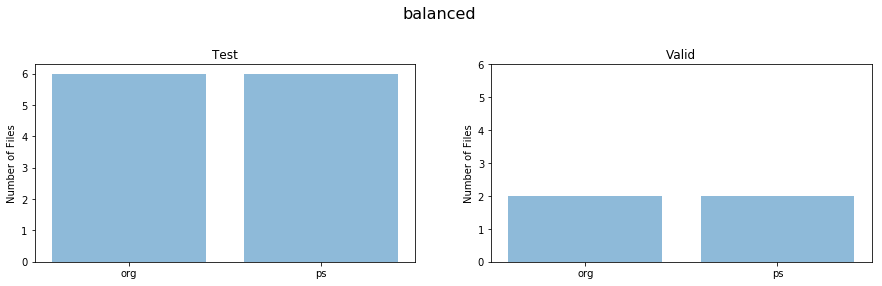

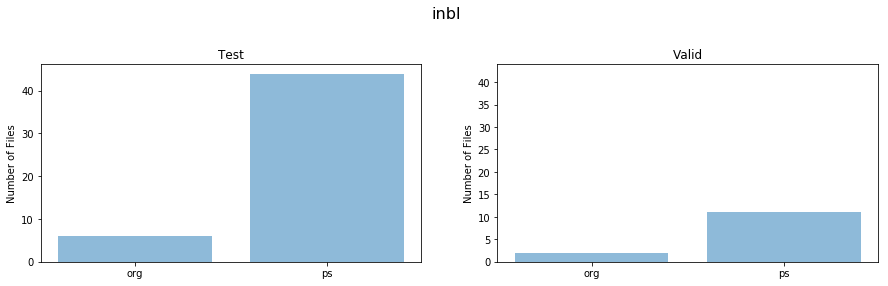

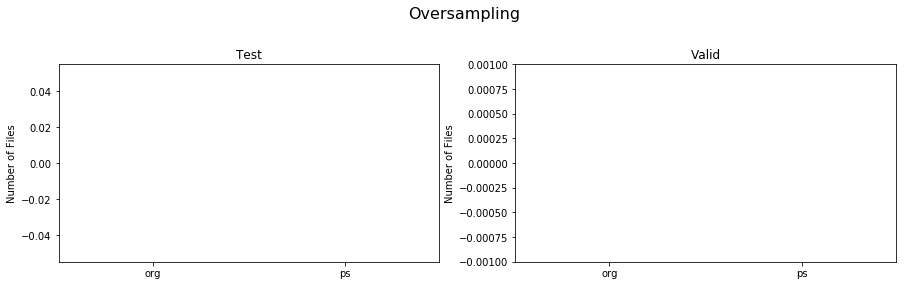

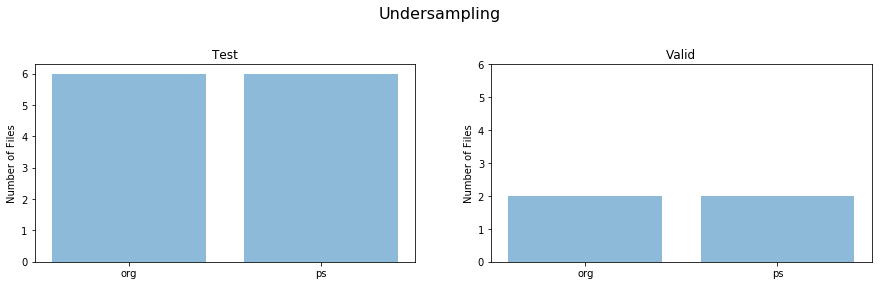

In [79]:
stats()

In [75]:
clear()